# Atividade 01 - Parte 01 - Inventário de emissões utilizando Python
Foi utilizado o capítulo 10.6 da AP42, pois a empresa fabrica MDF. https://www.epa.gov/sites/default/files/2020-10/documents/c10s0603.pdf

Fatores de emissão (FE) foram convertidos da seguinte maneira:

-Caso A: FE em lb/ODT = 0.5 kg/Mg = 0.35 kg/m3

Densidade do MDF = 700kg/m3 

-Caso B: FE em lb/MSF 3/4 = 0.26 kg/m3 

-Caso C: FE em lb/MSF = 0.0049 kg/m2 = 0.27 kg/m3

Espessura do MDF = 0.018m 

Taxa de atividade = 1.140 milhão m3/ano

In [47]:
import pandas as pd
import os
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

#dados de entrada
ta = 1.14 # taxa de atividade em milhao m3/ano
path = "C:\ENS5173\Dados\FE.csv"
fe = pd.read_csv(path) # fatores de emissao em kg/m3 
print(fe)

                                              Source      PM  PM-10    NOX  \
0  Tube dryer, direct wood-fired, blowline blend,...  3.6400  0.560    NaN   
1              Hot press, UF resin (SCC 3-07-009-60)  0.0468  0.039  0.039   
2  Former with blowline blend, UF resin (SCC 3-07...     NaN    NaN    NaN   
3                           Sander (SCC 3-07-009-83)     NaN    NaN    NaN   
4                   Saw and hogger (SCC 3-07-009-84)     NaN    NaN    NaN   

        CO  VOC as propane  
0  1.40000        2.100000  
1  0.00884        0.208000  
2      NaN        0.023450  
3      NaN        0.001782  
4      NaN        0.035100  


In [48]:
# criando funcao para calcular as emissoes 

def emis(FE, TA):
    emis = pd.DataFrame()
    cols_numericas = FE.select_dtypes(np.float64).columns
    emis = FE[cols_numericas] * TA
    emis = emis.set_index(FE['Source'])
    return emis

emissoes = emis(fe, ta)
print(emissoes) 


                                                          PM    PM-10  \
Source                                                                  
Tube dryer, direct wood-fired, blowline blend, ...  4.149600  0.63840   
Hot press, UF resin (SCC 3-07-009-60)               0.053352  0.04446   
Former with blowline blend, UF resin (SCC 3-07-...       NaN      NaN   
Sander (SCC 3-07-009-83)                                 NaN      NaN   
Saw and hogger (SCC 3-07-009-84)                         NaN      NaN   

                                                        NOX        CO  \
Source                                                                  
Tube dryer, direct wood-fired, blowline blend, ...      NaN  1.596000   
Hot press, UF resin (SCC 3-07-009-60)               0.04446  0.010078   
Former with blowline blend, UF resin (SCC 3-07-...      NaN       NaN   
Sander (SCC 3-07-009-83)                                NaN       NaN   
Saw and hogger (SCC 3-07-009-84)                  

In [55]:
# Criar um intervalo de datas
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='H')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month
df

,Data,Mes
0,2023-01-01 00:00:00,1
1,2023-01-01 01:00:00,1
2,2023-01-01 02:00:00,1
3,2023-01-01 03:00:00,1
4,2023-01-01 04:00:00,1
...,...,...
8732,2023-12-30 20:00:00,12
8733,2023-12-30 21:00:00,12
8734,2023-12-30 22:00:00,12
8735,2023-12-30 23:00:00,12


,Data,Mes,sazonalidade
0,2023-01-01 00:00:00,1,1.866025
1,2023-01-01 01:00:00,1,1.866025
2,2023-01-01 02:00:00,1,1.866025
3,2023-01-01 03:00:00,1,1.866025
4,2023-01-01 04:00:00,1,1.866025
...,...,...,...
8732,2023-12-30 20:00:00,12,2.000000
8733,2023-12-30 21:00:00,12,2.000000
8734,2023-12-30 22:00:00,12,2.000000
8735,2023-12-30 23:00:00,12,2.000000


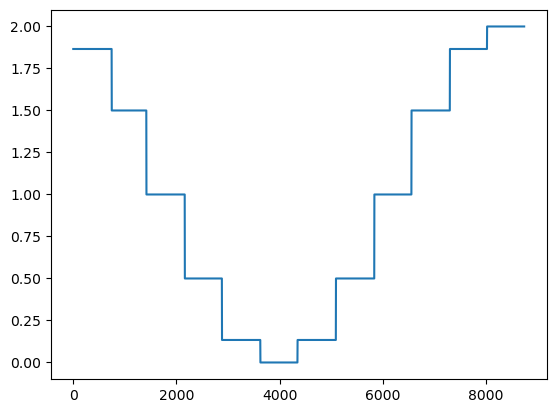

In [56]:
# variabilidade da TA entre os meses (componente sazonal)
sazonalidade = np.cos((2*np.pi)*df['Mes']/12)
df['sazonalidade'] = sazonalidade + 1
plt.plot(df["sazonalidade"])

df

In [59]:
# variabilidade da TA entre as horas (componente aleatoria), metodo de Monte-Carlo
atvMin = (ta/8760)*min(df['sazonalidade'])
atvMax = (ta/8760)*max(df['sazonalidade']) # obs: 1ano = 8760 horas

# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
df['atividade'] = atv  
df

,Data,Mes,sazonalidade,atividade
0,2023-01-01 00:00:00,1,1.866025,0.000213
1,2023-01-01 01:00:00,1,1.866025,0.000121
2,2023-01-01 02:00:00,1,1.866025,0.000187
3,2023-01-01 03:00:00,1,1.866025,0.000004
4,2023-01-01 04:00:00,1,1.866025,0.000252
...,...,...,...,...
8732,2023-12-30 20:00:00,12,2.000000,0.000237
8733,2023-12-30 21:00:00,12,2.000000,0.000153
8734,2023-12-30 22:00:00,12,2.000000,0.000155
8735,2023-12-30 23:00:00,12,2.000000,0.000095


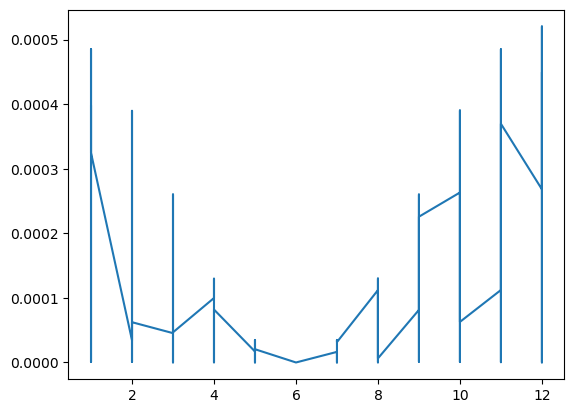

In [75]:
# Valores aleatórios com sazonalidade

df['aleatorioSazonal'] = df['atividade'] * df['sazonalidade']  
df
plt.plot(df['Mes'], df['aleatorioSazonal']) 

In [84]:
# emissoes a cada hora 

df_concatenado = pd.DataFrame()
for i in range(len(df['aleatorioSazonal'])): 
    aux = emis(fe, df['aleatorioSazonal'][i])
    df_concatenado = pd.concat([df_concatenado, aux], ignore_index=True)
    
df_concatenado 

,PM,PM-10,NOX,CO,VOC as propane
0,0.001444,0.000222,NaN,0.000555,8.328473e-04
1,0.000019,0.000015,0.000015,0.000004,8.249154e-05
2,NaN,NaN,NaN,NaN,9.300128e-06
3,NaN,NaN,NaN,NaN,7.067304e-07
4,NaN,NaN,NaN,NaN,1.392045e-05
...,...,...,...,...,...
43680,0.001631,0.000251,NaN,0.000627,9.407283e-04
43681,0.000021,0.000017,0.000017,0.000004,9.317690e-05
43682,NaN,NaN,NaN,NaN,1.050480e-05
43683,NaN,NaN,NaN,NaN,7.982752e-07


In [ ]:
# figuras